# Wstęp do multimediów (WMM)
### Kacper Górski, 331379


In [ ]:
from matplotlib import pyplot as plt
from IPython.display import display, Markdown
import cv2
import numpy as np
import copy
from wlasciwosci_obrazow import *
import os

Image index to process:  35
image_col, wymiary: (480, 720, 3), typ danych: uint8, wartości: 12 - 255


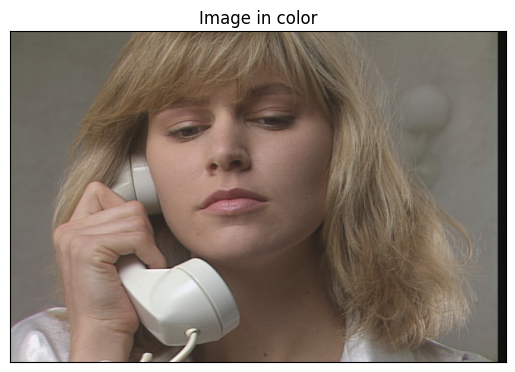

image, wymiary: (480, 720, 3), typ danych: uint8, wartości: 15 - 253


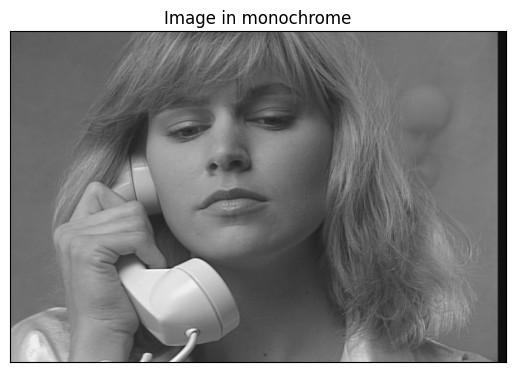

In [7]:
NUM_IMAGES = 36
STUDENT_INDEX = 331379

def image_to_process(student_index, num_images):
    return student_index % num_images

print("Image index to process: ", image_to_process(STUDENT_INDEX, NUM_IMAGES))

IMAGE_PATH_COL = os.path.join(os.getcwd(), "image", "susie_col.png")
IMAGE_PATH_MONO = os.path.join(os.getcwd(), "image", "susie_mono.png")

def load_image(path):
    image = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def plt_imshow(img, img_title="image"):
    plt.figure()
    plt.title(img_title)
    plt.imshow(img)
    plt.xticks([]), plt.yticks([])
    plt.show()

image_col = load_image(IMAGE_PATH_COL)
printi(image_col, "image_col")
plt_imshow(image_col, "Image in color")

image_mono = load_image(IMAGE_PATH_MONO)
printi(image_mono, "image")
plt_imshow(image_mono, "Image in monochrome")

### Obraz do przetworzenia -> susie_col.png (index: 35)

## Dla obrazu monochromatycznego: 

- Obliczyć entropię obrazu wejściowego.   

In [ ]:
hist_mono = cv2.calcHist([image_mono], [0], None, [256], [0, 256]).flatten()
mono_entropy = calc_entropy(hist_mono)
print("Entropia obrazu monochromatycznego: ", mono_entropy)

Entropia obrazu monochromatycznego:  [7.000969]


- Wyznaczyć obraz różnicowy w taki sposób, że wartość każdego piksela zastępowana jest różnicą 
pomiędzy wartością tego piksela a wartością jego lewego sąsiada (kodowanie różnicowe /. 
predykcyjne). Dla pierwszego piksela w linii należy przyjąć wartość sąsiada równą 127 (środkowa 
wartość przedziału zmienności wartości pikseli).     
Wyświetlić obraz różnicowy.     
Wyznaczyć histogram obrazu różnicowego i porównać go z histogramem obrazu oryginalnego.   
Wyznaczyć entropię obrazu różnicowego i porównać ją z entropią obrazu oryginalnego.   
Uwaga: należy pamiętać, że wartości pikseli w obrazie różnicowym są z zakresu [-255; 255]!   

- Wyznaczyć współczynniki DWT korzystając z funkcji zamieszczonej w przykładowym skrypcie.  
Wyświetlić poszczególne pasma.   
Wyznaczyć histogramy i obliczyć entropię dla wszystkich pasm.   
Porównać wyniki (histogram, entropia) uzyskane dla poszczególnych pasm między sobą (czy któreś 
się wyróżniają i dlaczego?) oraz z wynikami uzyskanymi dla obrazu oryginalnego i obrazu 
różnicowego.    
Uwaga: należy pamiętać, że wartości w pasmach LH, HL i HH są z zakresu [-255, 255]!    

- Obliczyć przepływność (liczbę bitów przypadającą na jeden piksel) dla obrazu skompresowanego 
koderem PNG (obraz wejściowy) i porównać ją z obliczonymi uprzednio entropiami obrazu 
oryginalnego, różnicowego i falokowego. Czy przepływność mniejsza od entropii oznacza, że 
zależność: lśr ≥ H jest nieprawdziwa?

## Dla obrazu barwnego:

- Obliczyć entropię dla składowych RGB barwnego obrazu testowego.

- Dokonać konwersji z RGB do YUV i obliczyć entropię dla składowych YUV. Wyświetlić składowe 
RGB i YUV.  
Wyznaczyć histogramy dla wszystkich składowych RGB i YUV.   
Porównać wyniki uzyskane dla poszczególnych składowych. Czy dla składowych UV entropia jest 
mniejsza? Z czego ta mniejsza wartość może wynikać? 

- Wyznaczyć zależność zniekształcenia D od przepływności R (liczba bitów przypadającą na jeden 
piksel obrazu): D = f(R) – tzw. krzywa R-D – dla kodera JPEG.   
Regulacji stopnia kompresji (przepływności R) należy dokonywać ustawiając wartości parametru 
‘quality’ przy zapisie obrazu do pliku. Wartości parametru ‘quality’ należy dobrać tak, aby uzyskać 
‘gładkie’ wykresy.   
Jako miarę zniekształceń należy użyć szczytowy stosunek sygnału do szumu PSNR i błąd 
średniokwadratowy MSE.   
Zobrazować zależności na wykresach (oddzielny wykres dla każdej miary).   
Dokonać subiektywnej oceny obrazów zrekonstruowanych (według własnej skali ocen, np.: jakość 
doskonała, bardzo dobra, dobra, średnia, kiepska, zła, bardzo zła, itp., lub: zniekształcenia 
niewidoczne, lekko widoczne, widoczne, bardzo widoczne, nie do przyjęcia, itp.) i zamieścić te oceny 
w sprawozdaniu (niekoniecznie dla każdego obrazu wynikowego osobno, raczej ‘zgrupować’ oceny 
dla pewnych zakresów przepływności).   
Porównać stopnie kompresji uzyskiwane dla kodera JPEG ze stopniem kompresji uzyskanym dla 
kodera PNG (pamiętając, że w pierwszej części laboratorium wykorzystywany był 
monochromatyczny obraz PNG, a kompresja JPEG była wykonywana dla obrazu barwnego; 
ewentualnie obliczyć przepływność bitową dla obrazu barwnego skompresowanego koderem PNG).